In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(precision=2, suppress=True)
%precision 2


F = 3500 # N
v = 3.25 # m/s
D = 550 # mm
L = 4 # year
t1 = 48 # s
t2 = 30 # s
T1 = 1 # N.mm
T2 = 0.6 # N.mm
def disp(*args):
    a = []
    for arg in args:
        a.append(arg)
    return np.array(a,dtype=float)

'%.2f'

## Motor Design $(power, rpm)$

In [67]:
# calculate efficiency, e = eta
e_coupling = 1
e_bearing = 0.99
e_helical_gear = 0.97
e_ch = 0.92
e_sys = e_coupling * e_bearing**3 * e_helical_gear * e_ch
disp(e_sys)

P_max = F*v/1000 # calculate max power of the belt conveyor, kW
P_work = P_max*np.sqrt((T1**2*t1 + T2**2*t2)/(t1+t2)) # calculate power given the work load, kW
P_motor = P_work/e_sys # lower limit of the motor's power, kW
disp(P_max, P_work, P_motor)

n_belt = v*6e4/np.pi/D # calculate rotational speed of the belt conveyor, rpm
u_ch = 5
u_hg = 4
u_sys = u_ch * u_hg # calculate transmission ratio of the system
n_motor = u_sys * n_belt # calculate theoretical rotational speed of the motor, rpm
disp(n_belt, u_sys, n_motor)
P_motor = 15 # power based on choice of motor, kW
n_motor = 2930 # rotational speed based on choice of motor, rpm
u_sys = n_motor / n_belt # new transmission ratio
u_hg = u_sys / u_ch # new transmission ratio of ch drive, given u_hg=const
disp(u_sys, u_ch)

P_ch = P_max
P_sh2 = P_ch / (e_ch*e_bearing) # power of shaft 2, kW
P_sh1 = P_sh2 / (e_helical_gear*e_bearing) # power of shaft 1, kW
P_motor = P_sh1 / (e_coupling) # power of motor, kW
n_sh1 = n_motor # rotational speed of shaft 1, rpm
n_sh2 = n_sh1 / (u_hg) # rotational speed of shaft 2, rpm
T_motor = 9.55e6 * P_motor / n_motor # torque of motor, N.mm
T_sh1 = 9.55e6 * P_sh1 / n_sh1 # torque of shaft 1, N.mm
T_sh2 = 9.55e6 * P_sh2 / n_sh2 # torque of shaft 2, N.mm
disp(P_motor, P_sh1, P_sh2)
disp(  n_motor,n_sh1, n_sh2)
disp(T_motor,T_sh1, T_sh2)

array([0.87])

array([11.38,  9.88, 11.41])

array([ 112.86,   20.  , 2257.11])

array([25.96,  5.  ])

array([13.01, 13.01, 12.49])

array([2930.  , 2930.  ,  564.28])

array([ 42389.39,  42389.39, 211368.23])

## Chain Drive Design

In [42]:
# find z1, z2
z_1 = np.ceil(29 - 2*u_ch)
z_2 = np.ceil(u_ch*z_1) + 1 # eq (5.1), p.80, plus 1 to obtain odd number of teeth

# find k, k_z, k_n
n01 = 600 # ~ n_sh2
k_z, k_n = 25/z_1, n01/n_sh2 # eq (5.3), p.81
k_0, k_a, k_dc, k_bt, k_d, k_c = 1, 1, 1, 1, 1.25, 1.3
k = k_0 * k_a * k_dc * k_bt * k_d * k_c # table 5.6, p.82
P_allowance = P_ch * k * k_z * k_n # equals 30.047 <= 42
P_allowance, p, dc, B = 42, 31.75, 9.55, 27.46 # table 5.5, p.81
d_1 = p/np.sin(np.pi/z_1) # examine table 5.8, p<p_max~31.75
d_2 = p/np.sin(np.pi/z_2) # examine table 5.8, p<p_max~31.75
a_min, a_max, a = 30*p, 50*p, 1000 # 952.5<a<1587.5, choose a = 1000
x = 2*a/p + (z_1+z_2)/2 + (z_2-z_1)**2*p/(4*np.pi**2*a) # eq (5.12), p.85
x_c = np.ceil(x)
a = 0.25*p*(x_c-0.5*(z_2+z_1)+np.sqrt((x_c-0.5*(z_2+z_1))**2-2*((z_2-z_1)/np.pi)**2)) - 0.003*a # eq (5.13), p.85
i = z_1*n_sh2/(15*x) # eq (5.14), p.85; i<[i]=25 at table 5.9, p.85
B_min, d_O, d_l, h_max, b_max, Q, q = 15.88, 7.95, 15.88, 24.2, 38, 56.7, 2.6 # table 5.2, p.78
k_f, k_d = 4, 1.2
v_1 = n_sh2*p*z_1/6e4
F_t, F_v, F_O = 1e3*P_ch/v_1, q*v_1**2, 9.81*k_f*q*a/1e3
s = Q*1e3/(k_d*F_t + F_O + F_v)
s >= 10.3 # table 5.10, p.86
n1 = np.array([1250,1000,900,800,630,500,400,300])
pm = np.array([12.7,15.875,19.5,25.4,31.75,38.1,44.5,50.8])
f = interp1d(n1,pm,kind='cubic')
k_x = 1.15
F_r = k_x*F_t # eq (5.20), p.88
zv = 0.85*v_1**.1
disp(i,v_1,F_t,F_v,F_O,s,F_r, F_O+F_v, F_O+F_v+F_t,zv)

True

array([   5.71,    5.67, 2004.99,   83.69,  103.01,   21.87, 2305.74,
        186.7 , 2191.69,    1.01])

array([18.97])

array([19.27])

array([ 40.25, 209.75,  45.45, 212.55,  36.45, 203.55,  37.83, 197.1 ,
        21.08,  19.27,   6.18,   1.02,   1.03, 574.76, 326.88, 315.21,
         1.02,   1.03])

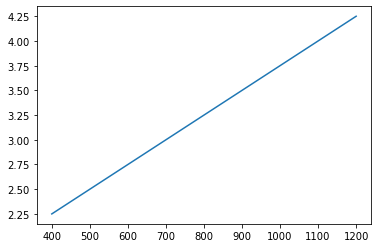

In [98]:
H1, H2, NFO1, NFO2, Lh, alp  = 280, 270, 4e6,4e6, 8*2*300*L, 20
SH,SF = 1.1,1.75
NHO1, NHO2 = 30*H1**2.4, 30*H2**2.4
NHE1, NHE2 = 60*n_sh1*Lh*(T1**3*t1 + T2**3*t2)/(t1+t2), 60*n_sh2*Lh*(T1**3*t1 + T2**3*t2)/(t1+t2)
NFE1, NFE2 = 60*n_sh1*Lh*(T1**6*t1 + T2**6*t2)/(t1+t2), 60*n_sh2*Lh*(T1**6*t1 + T2**6*t2)/(t1+t2)
KHL1, KHL2 = (NHO1/NHE1)**(1/6), (NHO2/NHE2)**(1/6)
KFL1, KFL2 = (NFO1/NFE1)**(1/6), (NFO2/NFE2)**(1/6)
KHL1, KHL2, KFL1, KFL2 = 1,1,1,1
sigH1, sigH2 = (2*H1+70)/SH*KHL1, (2*H2+70)/SH*KHL2
sigF1, sigF2 = (1.8*H1)*KFL1/SF, (1.8*H2)*KFL2/SF
sigH = np.average([sigH1,sigH2])
# disp(NHO1,NHO2,NHE1, NHE2, NFE1, NFE2)
# disp(KHL1, KHL2, KFL1, KFL2)
# disp(sigH1, sigH2, sigF1, sigF2, sigH,1.25*sigH2)

psiba,KHbet,KFbet = 0.5,1.11,1.26
psibd = 0.53*psiba*(u_hg+1)
aw = 43*(u_hg+1)*(T_sh1*KHbet/sigH**2/u_hg/psiba)**(1/3)
# disp(aw)
aw = 125
# disp(psibd,aw)
m, bet = 2, 20
z1 = 2*aw*np.cos(bet*np.pi/180) / (m*(u_hg+1))
disp(z1)
z1 = 19
z2 = u_hg*z1
z2 = 99
bw = psiba*aw
# disp(bw)
# fig, [ax1,ax2] = plt.subplots(nrows=2)
# ax1.plot(m*(z1+z2)/2/aw)
# ax2.plot(bet)
# disp(np.arccos(min(m*(z1+z2)/2/aw))*180/np.pi)
# disp(z1)
# disp(bw,m*(z1+z2)/aw)
bet = np.arccos(m*(z1+z2)/2/aw)
# disp(m*(z1+z2)/2/aw)
disp(bet)*180/np.pi
# disp(u_hg)
d1 = dw1 = m*z1/np.cos(bet)
d2 = dw2 = m*z2/np.cos(bet)
da1 = d1+2*(1+0.3)*m
da2 = d2+2*(1-0.3)*m
df1 = d1-(2.5-2*0.3)*m
df2 = d2-(2.5-2*-0.3)*m
db1 = d1*np.cos(alp*np.pi/180)
db2 = d2*np.cos(alp*np.pi/180)
alp_t = alp_tw = np.arctan(np.tan(alp*np.pi/180)/np.cos(bet))
v = np.pi*d1*n_sh1/6e4
zv = 0.85*v**.1
ys = 1.08-0.0695*np.log(m)
sigHH, sigFF1, sigFF2 = sigH*zv, sigF1*1.1*ys, sigF2*1.1*ys
disp(d1,d2,da1,da2,df1,df2,db1,db2,
                alp_t*180/np.pi,bet*180/np.pi,v,zv,ys,
               sigHH, sigFF1, sigFF2,zv,ys)

In [101]:
f1 = interp1d([400,500,600,700,800,900,1000,1200],
            [2.25,2.5,2.75,3,3.25,3.5,3.75,4.25])
f2 = interp1d([400,500,600,700,800,900,1000,1200],
             [2.75,3.05,3.36,3.66,3.96,4.28,4.6,5.2])
fes = interp1d([15,20,30,40,50,70,80,100],
              [0.87,0.83,0.77,0.73,0.7,0.66,0.64,0.62])
fes = interp1d([15,20,30,40,50,70,80,100],
               [0.92,0.89,0.81,0.78,0.76,0.73,0.71,0.7])

f1(850),f2(850)

(array(3.38), array(4.12))

In [96]:
bet_b = np.arctan(np.cos(alp_t)*np.tan(bet))
zm, zh = 274, np.sqrt(2*np.cos(bet_b)/np.sin(2*alp_tw))
epbet = bw*np.sin(bet)/m/np.pi
epalp = (np.sqrt(da1**2-db1**2)+np.sqrt(da2**2-db2**2)-2*aw*np.sin(alp_tw))/(2*np.pi*m*np.cos(alp_t)/np.cos(bet))
ze = epalp**-0.5
khv,kfv,kha,kfa = 1.06,1.17,1.13,1.37
kh, kf, mn = khv*kha*KHbet, kfa*kfv*KFbet, m*np.cos(bet)
sigHc = zm*zh*ze*np.sqrt(2*T_sh1*kh*(u_hg+1)/bw/u_hg/dw1**2)
ye, yb = epalp**-1, 1-bet*180/np.pi/140
zv1, zv2, yf1, yf2 = z1/np.cos(bet)**3, z2/np.cos(bet)**3, 3.57, 4.28
sigF1 = 2*T_sh1*kf*ye*yb*yf1/bw/dw1/mn
sigF2 = sigF1*yf2/yf1
Ft = 2*T_sh1/dw1
Fr = Ft*np.tan(alp_tw)
Fa = Ft*np.tan(bet)
disp(zh,epalp,epbet,ze,kh,kf,ye,zv1,zv2,sigF1,sigF2,mn)

array([  1.68,   1.19,   3.28,   0.92,   1.33,   2.02,   0.84,  22.59,
       117.68,  93.01, 111.51,   1.89])

## Shaft design

In [106]:
# F_r,bet,dw1,dw2,T_sh1,T_sh2 = 1088.95,10.141*np.pi/180,32,128,21575.73,83127.84
Ft1 = Ft2 = 2*T_sh1/dw1
Fr1 = Fr2 = Ft1*np.tan(alp*np.pi/180)/np.cos(bet)
Fa1 = Fa2 = Ft1*np.tan(bet)
r12, r21 = -dw1/2, dw2/2
hr12, cb12, cq1, hr21, cb21, cq2 = 1,1,1,-1,-1,-1
Fx12 = r12/abs(r12)*cq1*cb12*Ft1
Fx21 = r21/abs(r21)*cq2*cb21*Ft2
Fy12 = -r12/abs(r12)*Ft1*np.tan(alp_t)/np.cos(bet)
Fy21 = -r21/abs(r21)*Ft2*np.tan(alp_t)/np.cos(bet)
Fz12 = cq1*cb12*hr12*Ft1*np.tan(bet)
Fz21 = cq2*cb21*hr21*Ft2*np.tan(bet)
Fy22 = F_r*np.cos(210*np.pi/180)
Fx22 = F_r*np.sin(210*np.pi/180)
d1 = (T_sh1/.2/15)**(1/3)
d2 = (T_sh2/.2/30)**(1/3)
disp(T_sh1,T_sh2,d1,d2)
d1, d2, bO1, bO2 = 32,28,20,18
# d1, d2, bO1, bO2 = 35,40,21,23

lm13,lm12,lm22,lm23,k1,k2,k3,hn= 1.5*d1,1.5*d1,1.5*d2,1.5*d2,8,10,12,18
disp(np.round([lm13,lm12,lm22,lm23],2))
l22 = -(.5*(lm22+bO2)+k3+hn)
l23 = 0.5*(lm23+bO2)+k1+k2
l21 = 2*l23
l12 = -(.5*(lm12+bO1)+k3+hn)
l13 = 0.5*(lm13+bO1)+k1+k2
l11 = 2*l13
C2A2, A2D2, D2B2, A2B2 = -l22, l23, l23, l21
B1C1, A1D1, D1B1, A1B1 = -l12, l13, l13, l11
disp(l22, l23, l23, l21,l12, l13, l13, l11)
# disp(r12,r21,C2A2, A2D2, D2B2, A2B2,B1C1, A1D1, D1B1, A1B1)
disp(Ft1,Fr1,Fa1,Fx21,Fy21,Fz21,Fx22,Fy22,Fx12,Fy12,dw1)

array([ 42389.39, 211368.23,     24.18,     32.78])

array([[48., 48., 42., 42.]])

array([-60.,  48.,  48.,  96., -64.,  52.,  52., 104.])

array([ 2106.08,   812.03,   736.12,  2106.08,  -860.2 ,  -736.12,
       -1152.87, -1996.83, -2106.08,   860.2 ,    40.25])

In [103]:
from sympy import *
rA2y, rA2x, rB2y, rB2x, rA1y, rA1x, rB1y, rB1x = symbols('r_A2y, r_A2x, r_B2y, r_B2x, r_A1y, r_A1x, r_B1y, r_B1x')
eq1 = rA2x + rB2x + Fx21 + Fx22
eq2 = C2A2*rA2x + (C2A2+A2D2)*Fx21 + (C2A2+A2B2)*rB2x
rA2x,rB2x = np.array(list(linsolve([eq1,eq2],[rA2x,rB2x]))[0],dtype='float')
eq1 = rA2y + rB2y + Fy21 + Fy22
eq2 = C2A2*rA2y + (C2A2+A2D2)*Fy21 + (C2A2+A2B2)*rB2y + dw2*Fz21/2
rA2y,rB2y = np.array(list(linsolve([eq1,eq2],[rA2y,rB2y]))[0],dtype='float')
eq1 = rA1x + rB1x + Fx12
eq2 = A1D1*Fx12 + A1B1*rB1x
rA1x,rB1x = np.array(list(linsolve([eq1,eq2],[rA1x,rB1x]))[0],dtype='float')
disp(rA1x,rB1x)
eq1 = rA1y + rB1y + Fy12
eq2 = A1D1*Fy12 + A1B1*rB1y + dw1*Fz12/2
rA1y,rB1y = np.array(list(linsolve([eq1,eq2],[rA1y,rB1y]))[0],dtype='float')

MxA1, MxD1, MxB1, MxC1 = 0, A1D1*rA1x, 0, 0
MyA1, MyD1m, MyD1p, MyB1, MyC1 = 0, A1D1*rA1y, A1D1*rA1y - dw1*Fz12/2, A1B1*rA1y + D1B1*Fy12 - dw1*Fz12/2, 0
MxC2, MxA2, MxD2, MxB2 = 0, C2A2*Fx22, (C2A2+A2D2)*Fx22 + A2D2*rA2x, 0
MyC2, MyA2, MyD2m, MyD2p, MyB2 = 0, C2A2*Fy22, (C2A2+A2D2)*Fy22 + A2D2*rA2y, D2B2*rB2y,0

eqM = lambda mx, my, t: np.sqrt(mx**2 + my**2 + 0.75*t**2)
eq = lambda mx, my, t: np.sqrt(mx**2 + my**2)
MeA1 = eqM(MxA1,MyA1,0)
MeD1m = eqM(MxD1,MyD1m,T_sh1)
MeD1p = eqM(MxD1,MyD1p,T_sh1)
MeB1 = eqM(MxB1,MyB1,T_sh1)
MeC1 = eqM(MxC1,MyC1,T_sh1)
MeC2 = eqM(MxC2,MyC2,T_sh2)
MeA2 = eqM(MxA2,MyA2,T_sh2)
MeD2m = eqM(MxD2,MyD2m,T_sh2)
MeD2p = eqM(MxD2,MyD2p,T_sh2)
MeB2 = eqM(MxB2,MyB2,0)
MA1 = eq(MxA1,MyA1,0)
MD1m = eq(MxD1,MyD1m,T_sh1)
MD1p = eq(MxD1,MyD1p,T_sh1)
MB1 = eq(MxB1,MyB1,T_sh1)
MC1 = eq(MxC1,MyC1,T_sh1)
MC2 = eq(MxC2,MyC2,T_sh2)
MA2 = eq(MxA2,MyA2,T_sh2)
MD2m = eq(MxD2,MyD2m,T_sh2)
MD2p = eq(MxD2,MyD2p,T_sh2)
MB2 = eq(MxB2,MyB2,0)

Mes = np.array([MeA1,MeD1m,MeD1p,MeB1,MeC1,MeC2,MeA2,MeD2m,MeD2p,MeB2])
f = interp1d([30,50],[67,55])
ps1,ps2 = f([d1,30])
sig = np.array([ps1,ps1,ps1,ps1,ps1,ps2,ps2,ps2,ps2,ps2])
disp(dw1*Fz12/2,dw2*Fz21/2)
disp(rA1x,rA1y,rB1x,rB1y,rA2x,rA2y,rB2x,rB2y)
# disp(MeA1,MeD1m,MeD1p,MeB1,MeC1,MeC2,MeA2,MeD2m,MeD2p,MeB2)
# disp(MA1,MD1m,MD1p,MB1,MC1,MC2,MA2,MD2m,MD2p,MB2)
np.array((Mes/0.1/sig)**(1/3))
# disp(rA1x,Fx12,rB1x,0,rA1y,Fy12,rB1y,0)
# disp(Fx22,rA2x,Fx21,rB2x,Fy22,rA2y,Fy21,rB2y)
# disp(MxA1, MxD1, MxB1, MxC1)
# disp(MyA1, MyD1m, MyD1p, MyB1, MyC1)
# disp(MxC2, MxA2, MxD2, MxB2)
# disp(MyC2, MyA2, MyD2m, MyD2p, MyB2)
disp(-Fx12,-A1D1*Fx12)

array([1049.98, 1049.98])

array([  33881.3 , -176539.41])

array([ 1049.98,  -301.95,  1049.98,  -953.52,   823.43,  2033.64,
       -1770.53,  1218.67])

array([ 0.  , 22.32, 23.83, 18.2 , 18.2 , 30.12, 32.47, 32.68, 31.54,
        0.  ])

array([  2099.97, 109198.27])

## bearing design

In [175]:
X1,Y1,X2,Y2,lh,m1,m2 = .6,1.07,1.66,1,30000,3,3
Q1 = X1*abs(rA1y)+Y1*abs(Fz12)
Q2 = X2*abs(rB2y)+Y1*abs(Fz21)
L1 = lh*60*n_sh1*1e-6
L2 = lh*60*n_sh2*1e-6
Cd1 = Q1*L1**(1/m1)
Cd2 = Q2*L2**(1/m2)
ratioA1 = abs(Fz12)/np.sqrt(rA1x**2+rA1y**2)
ratioB1 = abs(Fz12)/np.sqrt(rB1x**2+rB1y**2)
ratioA2 = abs(Fz12)/np.sqrt(rA2x**2+rA2y**2)
ratioB2 = abs(Fz12)/np.sqrt(rB2x**2+rB2y**2)
disp(ratioA1,ratioB1,ratioA2,ratioB2)

array([0.34, 0.33, 0.15, 0.23])